# Airbnb Sydney Listings Data

![sydney_photo](sydney_photo.jpg)

## Table of Contents: * <a id="contents"></a>

\* **_Note_**: due to GitHub limitations, internal links in the Table of Contents do not work. To access Jupyter Notebook with all internal links working, please click here [nbviewer Jupyter Notebook viewer service](https://nbviewer.org/github/teona-pavliukova/airbnb_sydney_listings/blob/main/airbnb_sydney_listings.ipynb)

- [Goals](#goals)
- [Data](#data)
    - [Loading the data](#data_loading)
    - [Data information](#data_information)
    - [Data cleaning](#data_cleaning)
- [Exploratory Data Analysis](#eda)
    - [Big picture](#b_pict)
    - [Does a host experience relates to review scores?](#eda_1)
    - [Does a superhosts status relates to review scores?](#eda_2)
    - [Does price relates to review scores for location?](#eda_3)
    - [Does price relates to review scores for value](#eda_4)
    - [Does instant_bookable status relates to availability](#eda_5)
    - [What facilities top-1% of most expensive listings offers when compared with middle-1% of listings price-wise?](#eda_6)
- [Conclusion](#conclusion)

## Goals
<a id="goals"></a>

[(Back to Table of Contents)](#contents)

Airbnb is an American San Francisco-based company operating an online marketplace for short- and long-term homestays and experiences. The company acts as a broker and charges a commission from each booking.

This project takes into account listings in Sydney, Australia for the last twelve months preceding release date 13 March, 2023.

The goal for this project was to do the following:
* Get acquainted with the data
* Clean the data as required for the analysis
* Develop some questions for analysis
* Create data visualizations to help solve problems and answer questions
* Analyze variables within the data to gain patterns and insights on these questions

## Data <a id="data"></a>

[(Back to Table of Contents)](#contents)

The data with **Sydney Airbnb listings** was downloaded from [Inside Airbnb](http://insideairbnb.com/get-the-data/) website. Inside Airbnb is a mission driven project that provides data and advocacy about Airbnb's impact on residential communities. To reduce the size of the dataset some columns containing text descriptions and host-related data were removed from the initial dataset.

**Data Dictionary** can be accessed on the [Inside Airbnb](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596) website and is also uploaded to the [GitHub](https://github.com/teona-pavliukova/airbnb_sydney_listings/blob/main/Inside%20Airbnb%20Data%20Dictionary.xlsx) repository.

### Loading the Data <a id="data_loading"></a>

[(Back to Table of Contents)](#contents)

Firstly, the necessary libraries are loaded into the notebook.

The pandas library is used to import data from `sydney_airbnb_listings.csv`.

In [701]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [702]:
# load data and have a look into first 3 rows
data = pd.read_csv('sydney_airbnb_listings.csv', infer_datetime_format=True)
data.head(3)

,id,listing_url,name,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11156.0,https://www.airbnb.com/rooms/11156,An Oasis in the City,40855,Colleen,23/09/2009,"Potts Point, Australia",a few days or more,0%,50%,...,4.76,4.82,4.71,NaN,f,1,0,1,0,1.21
1,15253.0,https://www.airbnb.com/rooms/15253,Unique Designer Rooftop Apartment in City Loca...,59850,Morag,3/12/2009,"Sydney, Australia",within an hour,100%,99%,...,4.72,4.75,4.53,PID-STRA-24061-7,t,2,1,1,0,3.58
2,135691.0,https://www.airbnb.com/rooms/135691,Private room for your Bondi holiday,501973,Francine,11/04/2011,"Bondi Beach, Australia",within a few hours,100%,57%,...,4.88,4.79,4.59,PID-STRA-15719,f,1,0,1,0,0.26


### Data Information <a id="data_information"></a>

[(Back to Table of Contents)](#contents)

Some immediate insights about the data:
* There are 55 columns and 22659 rows in the initial dataset
* Some columns have incorrect data types assigned and would require data cleaning and wrangling.
* Column names are consistent and descriptive, no actions are required.
* A number of columns have missing values. Columns with the largest number of values missing are: *host_neighbourhood*, *host_response_time*, *host_response_rate*, *host_acceptance_rate*, *license* and *neighbourhood*.
* Column *id* should have unique values only. I identified that there are 207 duplicates. Detailed analysis showed that all duplicates have id represented with large numbers of 18 digits. Looks like these large numbers were not stored correctly and precision was lost, this can be fixed by extracting correct ids from *listing_url* column. After extraction, *listing_url* column can be removed as it will no longer be required.

In [703]:
# check data shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22659 entries, 0 to 22658
Data columns (total 55 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22659 non-null  float64
 1   listing_url                                   22659 non-null  object 
 2   name                                          22652 non-null  object 
 3   host_id                                       22659 non-null  int64  
 4   host_name                                     22657 non-null  object 
 5   host_since                                    22657 non-null  object 
 6   host_location                                 16525 non-null  object 
 7   host_response_time                            11201 non-null  object 
 8   host_response_rate                            11201 non-null  object 
 9   host_acceptance_rate                          11462 non-null 

In [704]:
# check null values
data.isnull().sum()

id                                                  0
listing_url                                         0
name                                                7
host_id                                             0
host_name                                           2
host_since                                          2
host_location                                    6134
host_response_time                              11458
host_response_rate                              11458
host_acceptance_rate                            11197
host_is_superhost                                  18
host_neighbourhood                              11632
host_listings_count                                 2
host_total_listings_count                           2
host_verifications                                  0
host_identity_verified                              2
neighbourhood                                    9679
neighbourhood_cleansed                              0
latitude                    

In [705]:
# id column should only have unique values. Check if we have duplicates with the same id
print(f"Number of unique ids: {data.id.nunique()}")
# count number of rows with the same id
duplicates = data[data.duplicated(subset='id', keep=False)]
duplicates_grouped = duplicates.groupby('id')['name'].count().sort_values(ascending=False)
print(f"Number of rows with the same id in the dataset: {len(duplicates)}")
duplicates_grouped.tail(5)


Number of unique ids: 22548
Number of rows with the same id in the dataset: 207


id
7.183630e+17    2
7.096940e+17    2
7.054570e+17    2
7.038850e+17    2
8.429420e+17    2
Name: name, dtype: int64

In [706]:
# replace id column with correct ids extracted from listing_url column
data['id'] = data['listing_url'].str.rpartition('/')[2]
# check that changes applied
print(f"Number of unique ids: {data.id.nunique()}")
duplicates = data[data.duplicated(subset='id', keep=False)]
print(f"Number of rows with the same id in the dataset: {len(duplicates)}")
# remove listing_url column
data.drop('listing_url', axis=1, inplace=True)

Number of unique ids: 22659
Number of rows with the same id in the dataset: 0


### Data Cleaning <a id="data_cleaning"></a>

[(Back to Table of Contents)](#contents)

Data cleaning for this dataset includes the following steps:

1. Columns *host_since*, *calendar_last_scraped*, *first_review*, and *last_review* contain dates and should be cast as datetime to allow further analysis of time series data in the EDA section.
2. Columns *host_is_superhost*, *host_identity_verified*, *has_availability*, and *instant_bookable* contain boolean data and should be cast as bool. Missing values for this columns to be replaced with False.
3. Values for *has_availability* column are not consistent with *availability_30*, *availability_60*, *availability_90*, and *availability_365* columns. Values for *has_availability* column should be set to True if any of the availability columns have values > 0.
3. Column *host_id* contain ids, not regular numbers, and should be cast as strings.
4. Column *neighbourhood* should contain neighbourhood name only without country/state names. Missing values for this column to be replaced with values from the *neighbourhood_cleansed* column - it contains geocoded neighbourhoods obtained from the *latitude* and *longitude* columns. Once missing values are replaced, *neighbourhood_cleansed* column to be removed from the dataset as it will not be required any more.
5. Columns *host_response_rate* and *host_acceptance_rate* should have % removed to allow for calculations. They will also be calculated as rates not percentages to better align with the columns names.
6. Column *price* should have '$' and ',' removed and cast as float.
7. Columns *host_verifications* and *amenities* contain lists that are stored as strings. To allow easier analysis, values shall be stored as lists.
8. Columns containing text only should be cast as strings for consistency (e.g. *id*, *name*, *host_name*, etc.).
10. Our dataset contains a *host_since* column; however, a column with the experience in years for each host will be easier for analysis. Because of this, a new column *years_exp* was created.

In [707]:
# create a list of names for columns with dates
dates_columns = ['host_since', 'calendar_last_scraped', 'first_review', 'last_review']
# check how dates are stored in dates column
data[dates_columns].head()

,host_since,calendar_last_scraped,first_review,last_review
0,23/09/2009,14/03/2023,5/12/2009,13/03/2020
1,3/12/2009,13/03/2023,23/02/2012,6/03/2023
2,11/04/2011,13/03/2023,9/01/2012,7/03/2023
3,22/04/2010,14/03/2023,20/10/2010,3/01/2020
4,6/11/2010,14/03/2023,29/12/2010,13/03/2023


In [708]:
# cast dates columns as datetime
data[dates_columns] = data[dates_columns].apply(pd.to_datetime, format='%d/%m/%Y')
# check that changes applied
data[dates_columns].head()

,host_since,calendar_last_scraped,first_review,last_review
0,2009-09-23,2023-03-14,2009-12-05,2020-03-13
1,2009-12-03,2023-03-13,2012-02-23,2023-03-06
2,2011-04-11,2023-03-13,2012-01-09,2023-03-07
3,2010-04-22,2023-03-14,2010-10-20,2020-01-03
4,2010-11-06,2023-03-14,2010-12-29,2023-03-13


In [709]:
# create a list of names for columns with booleans
bool_columns = ['host_is_superhost', 'host_identity_verified', 'has_availability', 'instant_bookable']
# create a mapping dictionary for booleans
bool_map_dict = {'f': False, 't': True}
# replace values in bool_columns with booleans
data[bool_columns] = data[bool_columns].applymap(bool_map_dict.get, na_action='ignore')
# fill in missing values with False and cast bool_columns as bool
data[bool_columns] = data[bool_columns].fillna(False).astype('bool')
# check that changes applied
data[bool_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22659 entries, 0 to 22658
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   host_is_superhost       22659 non-null  bool 
 1   host_identity_verified  22659 non-null  bool 
 2   has_availability        22659 non-null  bool 
 3   instant_bookable        22659 non-null  bool 
dtypes: bool(4)
memory usage: 88.6 KB


In [710]:
# check if values in has_availability column are consistent with 'availability_30', 'availability_60', 'availability_90', 'availability_365' columns.
avail_col_all = ['has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365']
avail_col_red = ['availability_30', 'availability_60', 'availability_90', 'availability_365']
data[avail_col_all].head(5)
# If any of the avail_columns_red have values > 0, has_availability should be set to True. Values are not consistent and shall be fixed

,has_availability,availability_30,availability_60,availability_90,availability_365
0,True,8,38,68,343
1,True,2,6,11,179
2,True,28,58,88,179
3,True,0,0,0,0
4,True,1,1,1,1


In [711]:
# set has_availability to True if any of the avail_columns_red have values > 0
data['has_availability'] = data[avail_col_red].gt(0).any(axis=1)
data[avail_col_all].head(5)

,has_availability,availability_30,availability_60,availability_90,availability_365
0,True,8,38,68,343
1,True,2,6,11,179
2,True,28,58,88,179
3,False,0,0,0,0
4,True,1,1,1,1


In [712]:
# cast id host_id column as string
data['host_id'] = data['host_id'].astype('string')
# check that changes applied
data['host_id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 22659 entries, 0 to 22658
Series name: host_id
Non-Null Count  Dtype 
--------------  ----- 
22659 non-null  string
dtypes: string(1)
memory usage: 177.1 KB


In [713]:
# check how neighbourhood is stored in the dataset
data[['id', 'neighbourhood']].head()

,id,neighbourhood
0,11156,"Potts Point, New South Wales, Australia"
1,15253,"Darlinghurst, New South Wales, Australia"
2,135691,"Bondi, New South Wales, Australia"
3,44545,"Darlinghurst, New South Wales, Australia"
4,58506,"Mosman, New South Wales, Australia"


In [714]:
# remove state and country names from neighbourhood column
data['neighbourhood'] = data['neighbourhood'].str.partition(',')[0]
# remove leading and trailing whitespaces from neighbourhood column and change to title case
data['neighbourhood'] = data['neighbourhood'].str.strip().str.title()
# save value counts for neighbourhood column into a separate df
neighb_count = data['neighbourhood'].value_counts().reset_index()
neighb_count.columns = ['neighbourhood', 'count']
neighb_count.sort_values(by=['count', 'neighbourhood'], inplace=True, ignore_index=True, ascending=[False, True])
# look into bottom-10 neighbourhoods
neighb_count.tail()

,neighbourhood,count
559,Waverly,1
560,Woronora,1
561,Yennora,1
562,Yowie Bay,1
563,石谷市,1


In [715]:
# neighbourhoods names with small count look suspicious and can contain typos and non-english symbols, safe to replace them with values from neighbourhood_cleansed column
# save neighbourhoods names with count <= 3 into a separate list
susp_neighb_names = list(neighb_count.loc[neighb_count['count'] < 4]['neighbourhood'].unique())
# replace neighbourhoods from susp_neighb_names with NaN value
data['neighbourhood'].mask(data['neighbourhood'].isin(susp_neighb_names), np.nan, inplace=True)

In [716]:
# replace missing values in neighbourhood column with values from neighbourhood_cleansed column
data['neighbourhood'].fillna(data['neighbourhood_cleansed'], inplace=True)
# check that changes applied
data['neighbourhood'].info()
# remove neighbourhood_cleansed column as it will no longer be required
data.drop('neighbourhood_cleansed', axis=1, inplace=True)

<class 'pandas.core.series.Series'>
RangeIndex: 22659 entries, 0 to 22658
Series name: neighbourhood
Non-Null Count  Dtype 
--------------  ----- 
22659 non-null  object
dtypes: object(1)
memory usage: 177.1+ KB


In [717]:
# create a list of names for columns with rates
rates_columns = ['host_response_rate', 'host_acceptance_rate']
# remove % symbol from columns with rates
data[rates_columns] = data[rates_columns].apply(lambda x: x.str.rstrip('%'))
data[rates_columns].head(3)

,host_response_rate,host_acceptance_rate
0,0,50
1,100,99
2,100,57


In [718]:
# cast rates columns as float32 and divide values by 100
data[rates_columns] = round(data[rates_columns].astype('float32')/100, 2)
# check that changes applied
print(data[rates_columns].info())
data[rates_columns].head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22659 entries, 0 to 22658
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    11201 non-null  float32
 1   host_acceptance_rate  11462 non-null  float32
dtypes: float32(2)
memory usage: 177.1 KB
None


,host_response_rate,host_acceptance_rate
0,0.0,0.50
1,1.0,0.99
2,1.0,0.57


In [719]:
# remove $ symbol from price column
data['price'] = data['price'].str.lstrip('$')
# remove , symbol from price column
data['price'] = data['price'].str.replace(',', '')
# cast price column as float
data['price'] = pd.to_numeric(data['price'], downcast='float')
# check that changes applied
data['price'].head(3)

0     65.0
1    105.0
2    200.0
Name: price, dtype: float32

In [720]:
# columns host_verifications and amenities contain lists that are currently stored as strings. To allow easier analysis, values shall be stored as lists
# create a list of names for columns with lists
lists_columns = ['host_verifications', 'amenities']
data[lists_columns].head(3)

,host_verifications,amenities
0,"['email', 'phone']","[""Hot water"", ""Cooking basics"", ""Single level ..."
1,"['email', 'phone']","[""Coffee maker"", ""Hot water"", ""Long term stays..."
2,"['email', 'phone']","[""Conditioner"", ""Hot water"", ""Bathtub"", ""Outdo..."


In [721]:
# cast values as lists
data[lists_columns] = data[lists_columns].applymap(eval)
# check that changes applied
print(type(data.iloc[0]['host_verifications']))
data[lists_columns].head(3)

<class 'list'>


,host_verifications,amenities
0,"[email, phone]","[Hot water, Cooking basics, Single level home,..."
1,"[email, phone]","[Coffee maker, Hot water, Long term stays allo..."
2,"[email, phone]","[Conditioner, Hot water, Bathtub, Outdoor furn..."


In [722]:
# create a list of string_columns names that are cast as objects
string_columns = list(data.select_dtypes(include='object'))
# remove names for string_columns that contain lists
string_columns = [col for col in string_columns if col not in lists_columns]
# cast string_columns that contain text only as strings
data[string_columns] = data[string_columns].astype('string')
# check that changes applied
data[string_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22659 entries, 0 to 22658
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  22659 non-null  string
 1   name                22652 non-null  string
 2   host_name           22657 non-null  string
 3   host_location       16525 non-null  string
 4   host_response_time  11201 non-null  string
 5   host_neighbourhood  11027 non-null  string
 6   neighbourhood       22659 non-null  string
 7   property_type       22659 non-null  string
 8   room_type           22659 non-null  string
 9   bathrooms_text      22639 non-null  string
 10  license             11653 non-null  string
dtypes: string(11)
memory usage: 1.9 MB


In [723]:
# add new year_exp column
release_date = np.datetime64('2023-03-13')
data['years_exp'] = round((release_date - data['host_since']) / np.timedelta64(1, 'Y'), 0)
data['years_exp'].head()

0    13.0
1    13.0
2    12.0
3    13.0
4    12.0
Name: years_exp, dtype: float64

## Exploratory Data Analysis <a id="eda"></a>

[(Back to Table of Contents)](#contents)

After some data cleaning and tidying, the DataFrame is ready for EDA.

The following independent variables will be focused on in the analysis:
* years_exp
* host_is_superhost
* neighbourhood
* instant_bookable

The goal will be to see how these independent variables associate with the following dependent variables:
* price
* has_availability
* review_scores_rating
* review_scores_accuracy
* review_scores_cleanliness
* review_scores_checkin  
* review_scores_location
* review_scores_value
* amenities

The hope is that through summary statistics and visualizations the following question can be answered:

1. Does a host experience relates to review scores? [link](#eda_1)
2. Does a superhosts status relates to review scores? [link](#eda_2)
3. Does price relates to review scores for location? [link](#eda_3)
4. Does price relates to review scores for value? [link](#eda_4)
5. Does instant_bookable status relates to availability? [link](#eda_5)
6. What facilities top-1% of most expensive listings offers when compared with middle-1% of listings price-wise? [link](#eda_6)

Along the way, these questions may be refined and more questions may arise.

### Big picture <a id="b_pict"></a>

[(Back to Table of Contents)](#contents)

Some basic summary statistics on each of the numerical variables presented below. Some columns have outliers (*host_listings_count*, *price* etc.).

In order to observe the dataset as a whole, `DataFrame.hist()` is used. It gives a full view of the distribution of all numerical variables. Response rates, acceptance rates and all review scores are skewed left and have similar distributions. Listings counts, bedrooms, beds, price, minimum nights, number of reviews are skewed right and have similar distributions. Accommodates, maximum nights, availabilities have multiple peaks but they do not have have similar distributions. Host experience in years resembles normal distribution with a distinctive peak ~ 7 years.

The table of correlations does not offer much help as there are too many numbers to read through however the heatmap makes the analysis easier. The heatmap shows that review scores have strongest association between themselves and also that *host_is_superhost*, *price* and *years_exp* have some association with numerous variables.

In [724]:
# descriptive summary statistics for numeric columns
data.drop(['latitude', 'longitude'], axis=1).describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,years_exp
count,11201.000000,11462.000000,22657.000000,22657.000000,22659.000000,21302.000000,22275.000000,22659.000000,22659.000000,22659.000000,...,16577.000000,16594.000000,16579.000000,16576.000000,22659.000000,22659.000000,22659.000000,22659.000000,17113.000000,22657.000000
mean,0.928127,0.856389,21.059584,38.048594,3.591862,1.805042,2.118653,300.860443,50.546670,785.877885,...,4.816674,4.818089,4.810917,4.609740,11.466481,10.111479,1.292820,0.041132,0.972907,6.697047
std,0.215149,0.243898,100.140884,171.712006,2.306197,1.098401,1.517303,563.981567,52.682123,449.678013,...,0.411015,0.425228,0.360046,0.514632,33.598263,32.441788,8.017288,0.442754,1.344785,2.609388
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,0.990000,0.830000,1.000000,1.000000,2.000000,1.000000,1.000000,98.000000,2.000000,365.000000,...,4.800000,4.820000,4.760000,4.500000,1.000000,0.000000,0.000000,0.000000,0.060000,5.000000
50%,1.000000,0.980000,1.000000,2.000000,3.000000,1.000000,2.000000,179.000000,90.000000,1125.000000,...,4.970000,4.980000,4.930000,4.750000,1.000000,1.000000,0.000000,0.000000,0.410000,7.000000
75%,1.000000,1.000000,4.000000,6.000000,4.000000,2.000000,3.000000,305.000000,90.000000,1125.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,2.000000,1.000000,0.000000,1.430000,9.000000
max,1.000000,1.000000,951.000000,1601.000000,16.000000,13.000000,28.000000,28613.000000,1125.000000,1500.000000,...,5.000000,5.000000,5.000000,5.000000,231.000000,231.000000,103.000000,9.000000,20.500000,14.000000


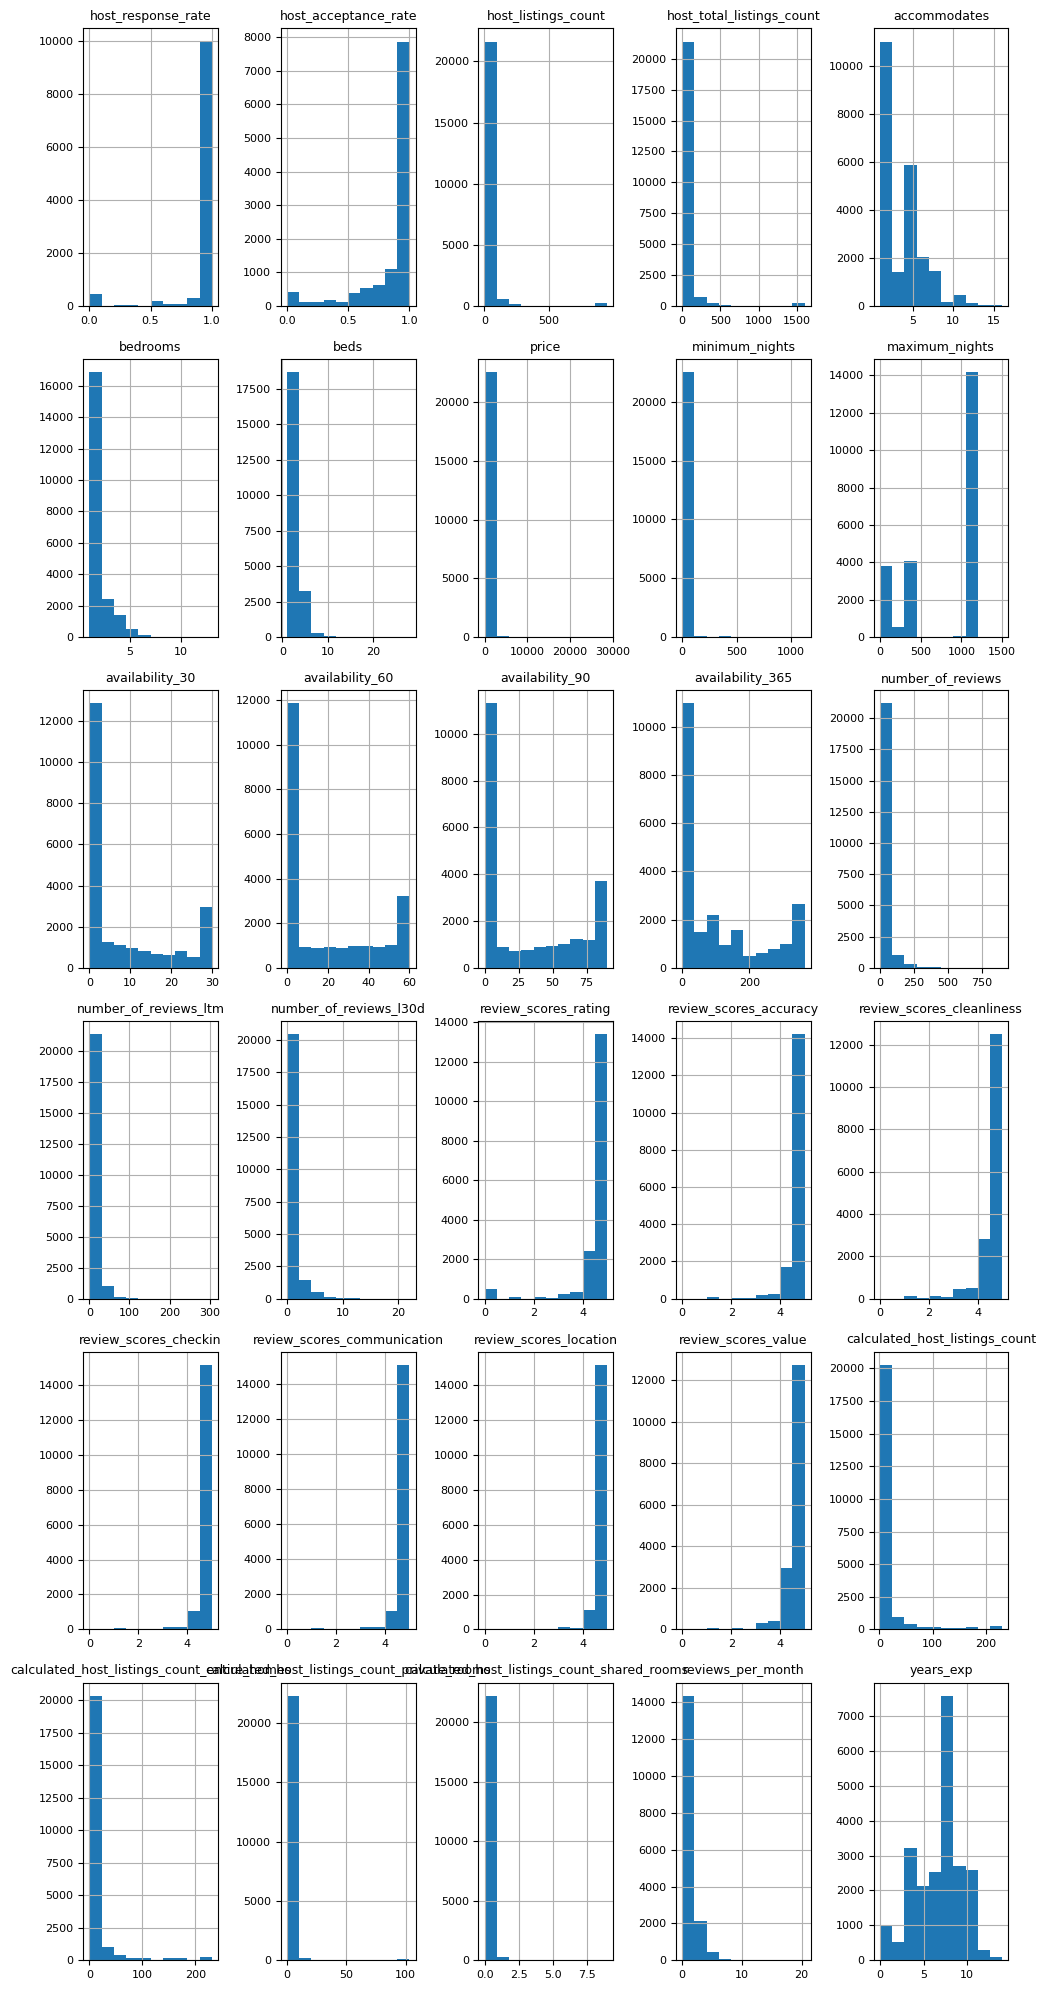

<Figure size 640x480 with 0 Axes>

In [725]:
# plot histograms for all numerical variables
# set parameters to titles and axes ticks labels
params = {'axes.titlesize':'9',
          'xtick.labelsize':'8',
          'ytick.labelsize':'8'}
matplotlib.rcParams.update(params)
# plot histograms
fig = data.drop(['host_since', 'latitude', 'longitude', 'calendar_last_scraped', 'first_review', 'last_review'], axis=1).\
           hist(figsize=(10,20))
plt.tight_layout()
plt.show()
plt.clf()
plt.rcdefaults()

In [726]:
# create a list of columns with variables we will be focusing on
focus_numeric_columns = ['years_exp', 'host_is_superhost', 'instant_bookable', 'price', 'has_availability', 'review_scores_rating',
                     'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
# create correlation table
corr_table = data[focus_numeric_columns].corr()
corr_table

,years_exp,host_is_superhost,instant_bookable,price,has_availability,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
years_exp,1.000000,0.017498,-0.134074,0.020910,-0.177256,0.050512,0.107436,0.062659,0.108036,0.102536,0.085180,0.091499
host_is_superhost,0.017498,1.000000,-0.044652,0.050473,0.269822,0.158446,0.140513,0.177525,0.114736,0.125465,0.089362,0.129760
instant_bookable,-0.134074,-0.044652,1.000000,-0.058807,-0.002899,-0.070675,-0.088745,-0.083706,-0.078053,-0.083073,-0.045077,-0.081414
price,0.020910,0.050473,-0.058807,1.000000,0.126564,0.051970,0.039310,0.048282,0.039920,0.025748,0.059234,-0.016406
has_availability,-0.177256,0.269822,-0.002899,0.126564,1.000000,0.119014,-0.013367,0.077730,-0.015260,-0.020968,-0.000374,-0.036980
review_scores_rating,0.050512,0.158446,-0.070675,0.051970,0.119014,1.000000,0.795212,0.756617,0.643945,0.694398,0.545267,0.784628
review_scores_accuracy,0.107436,0.140513,-0.088745,0.039310,-0.013367,0.795212,1.000000,0.686316,0.644904,0.688701,0.567366,0.756592
review_scores_cleanliness,0.062659,0.177525,-0.083706,0.048282,0.077730,0.756617,0.686316,1.000000,0.517451,0.543391,0.459564,0.673665
review_scores_checkin,0.108036,0.114736,-0.078053,0.039920,-0.015260,0.643945,0.644904,0.517451,1.000000,0.746860,0.513576,0.602068
review_scores_communication,0.102536,0.125465,-0.083073,0.025748,-0.020968,0.694398,0.688701,0.543391,0.746860,1.000000,0.545915,0.651505


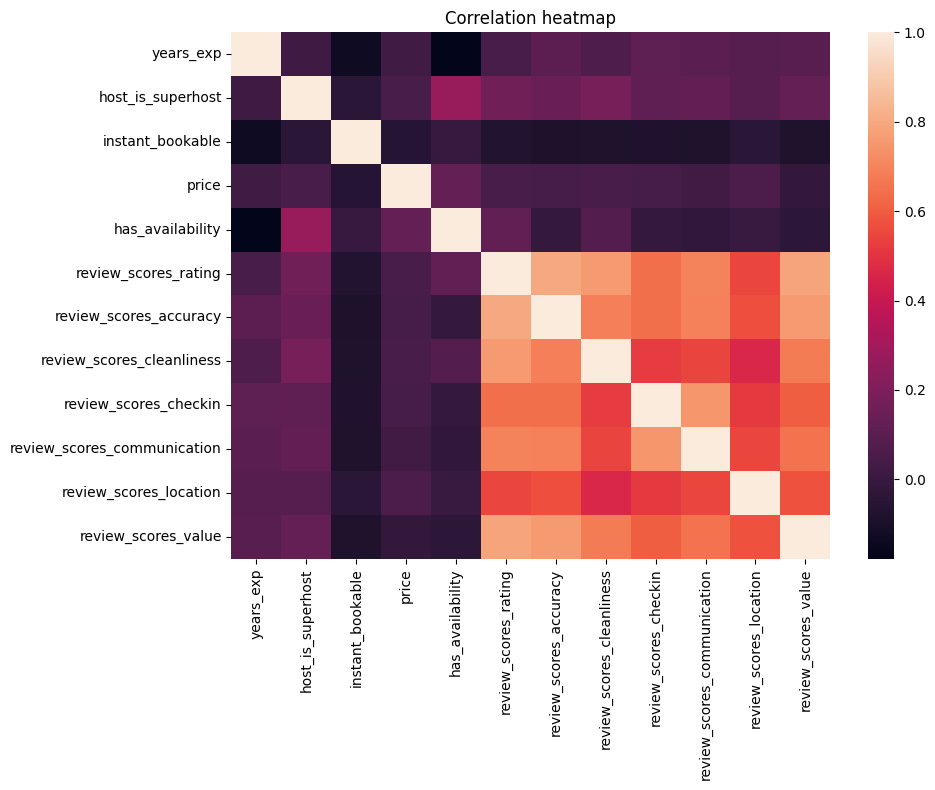

<Figure size 640x480 with 0 Axes>

In [727]:
# plot heat matrix that shows correlation across all focus numerical variables
plt.figure(figsize=(10,8))
sns.heatmap(data=corr_table)
plt.title('Correlation heatmap')
plt.tight_layout()
plt.show()
plt.clf()

### 1. Does a host experience relates to review scores? <a id="eda_1"></a>

[(Back to Table of Contents)](#contents)

In the dataset host experience ranges from 0 to 14 years. To make it easier to discover any patterns, a new column *exp_group* was created and all hosts were classified into experience groups based on their years of experience (5 unique experience groups, 3 years of experience in each group). As can be seen from the countplot below, the largest number of listings have hosts that have 6-8 years of experience; approximately equal number of listings have hosts with 3-5 and 9-11 years of experience; and the smallest number of listings have hosts with 0-2 and 12-14 years of experience.

As can be seen from a series of boxplots below,there are multiple outliers for each type of review scores and experience groups. Also, big picture analysis showed that all review scores are strongly left-skewed. Considering this, it will be better to compare robust statistics such as medians and interquartile ranges instead of average scores as robust statistics are not affected by outliers.

The majority of review scores received are quite high with the median scores for experience groups ranging from 4.7 to 5.0. Experience group 3-5 years tend to have larger interquartile range and longer lower whisker for all types of review scores indicating higher range of scores than any other experience group. Experience groups 6-8 years and 9-11 years have smallest interquartile range for review scores for check-in and communication indicating that hosts with that amount of experience tend to be consistently good with these types of activities. In general, there doesn't seem to be distinctive patterns between host's experience group and review scores received from customers.

In [728]:
# classify hosts into groups based on their years_exp
# set a list of conditions - 
conditions = [
    data['years_exp'].le(2),
    data['years_exp'].ge(3) & data['years_exp'].le(5),
    data['years_exp'].ge(6) & data['years_exp'].le(8),
    data['years_exp'].ge(9) & data['years_exp'].le(11),
    data['years_exp'].ge(12)
]
# set a list of groups names
choices = [
    '0-2 years',
    '3-5 years',
    '6-8 years',
    '9-11 years',
    '12-14 years'
]
# classify each host into experience groups
data['exp_group'] = np.select(conditions, choices, default=None)
# set exp_group as a categorical variable
data['exp_group'] = pd.Categorical(data['exp_group'], categories=choices, ordered=True)
# count number of hosts in each experience group
print(data.groupby('exp_group')['id'].count().sort_values(ascending=False).reset_index())

     exp_group     id
0    6-8 years  10113
1    3-5 years   5358
2   9-11 years   5300
3    0-2 years   1513
4  12-14 years    373


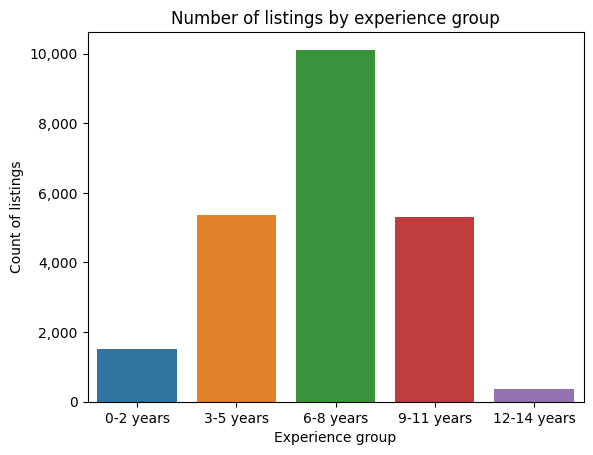

<Figure size 640x480 with 0 Axes>

In [729]:
# plot count of listings for each exp_group
fig, ax = plt.subplots()
sns.countplot(data=data, x='exp_group', ax=ax)
ax.set(title='Number of listings by experience group', xlabel='Experience group', ylabel='Count of listings')
ax.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()
plt.clf()

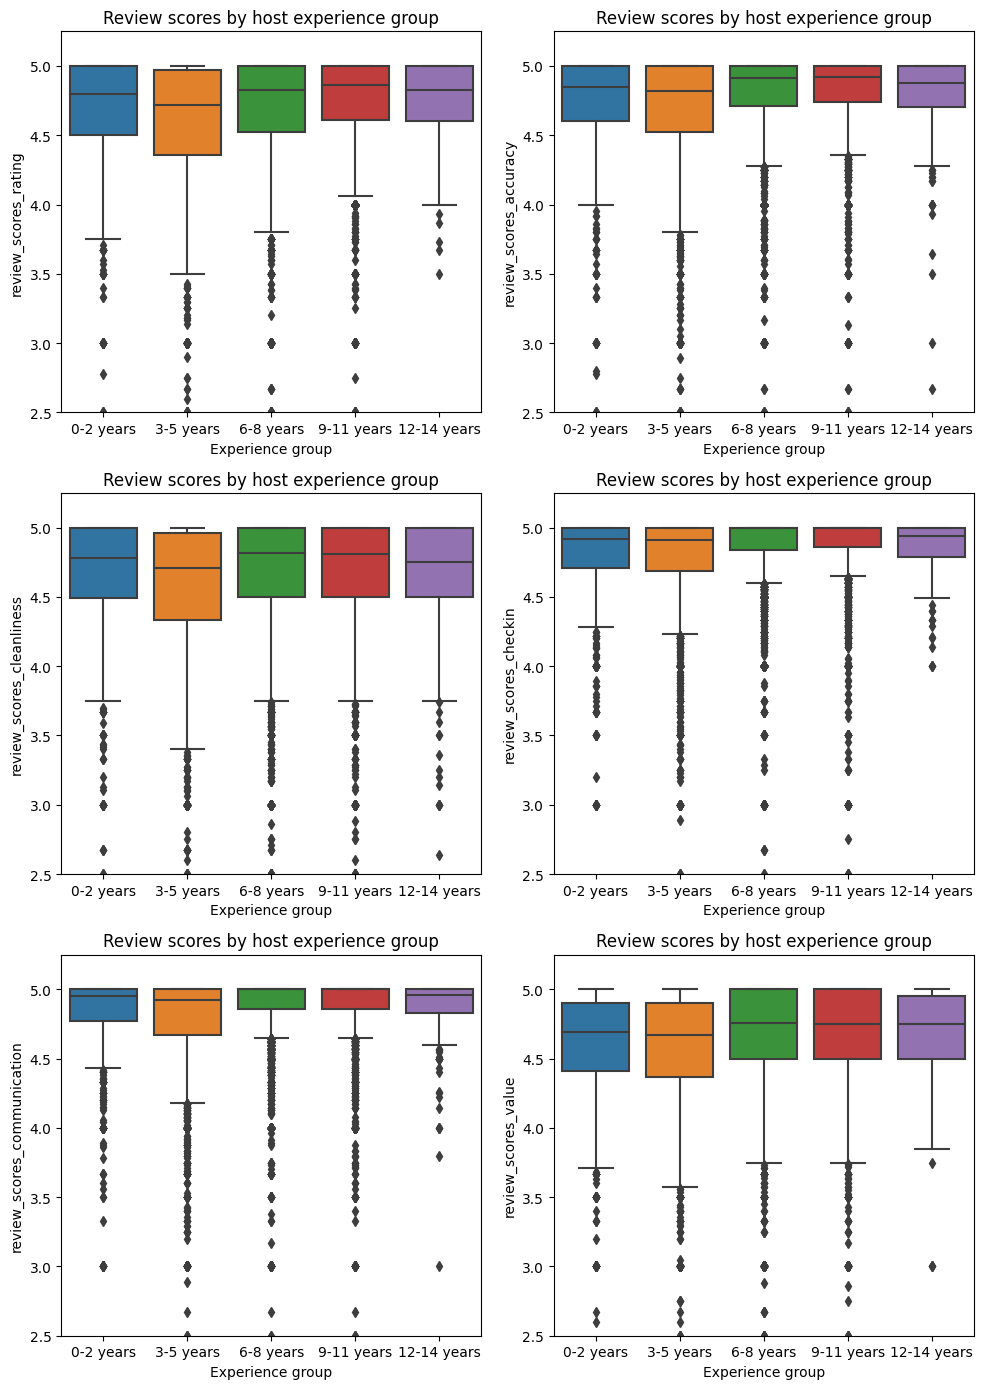

<Figure size 640x480 with 0 Axes>

In [730]:
# set a list of review scores columns
review_scores_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                         'review_scores_communication', 'review_scores_value']
plot=0
# plot boxplots for review scores for each experience group
fig = plt.figure(figsize=(10,14))
# loop through review scores columns and plot boxplots for each review scores
for i in range(len(review_scores_columns)):
    plot += 1
    ax = plt.subplot(3, 2, plot)
    sns.boxplot(x=data['exp_group'], y=data[review_scores_columns[i]])
    ax.set(title='Review scores by host experience group', xlabel='Experience group')
    ax.set_ylim((2.5, 5.25))
plt.tight_layout()
plt.show()
plt.clf()

### 2. Does a superhost status relates to review scores? <a id="eda_2"></a>

[(Back to Table of Contents)](#contents)

A pie chart below shows that only 13.8% of all listings is managed by superhosts. As can be seen from boxplots, listings that have hosts with superhost status have smaller interquartile ranges for all types of review scores received indicating that superhosts are more consistent in receiving good reviews. Listings managed by superhosts have higher median scores received for all types of review scores except for checkin and communication where both types of hosts have very similar median review scores. Difference between median scores is highest for rating and cleanliness. All of this indicates higher chance that customers will be satisfied with the listings managed by superhosts.


In [731]:
# calculate percentages of listings for each host status
perc_host_status = data.groupby('host_is_superhost')['id'].count().reset_index()
perc_host_status.columns = ['host_is_superhost', 'percent']
total_ids = data['id'].shape[0]
perc_host_status['percent'] = round(perc_host_status['percent'] / total_ids * 100, 1)
perc_host_status

,host_is_superhost,percent
0,False,86.2
1,True,13.8


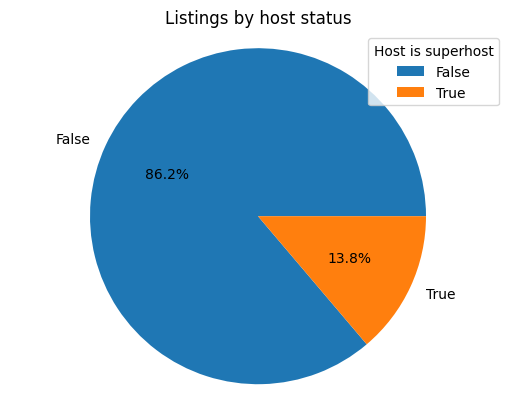

<Figure size 640x480 with 0 Axes>

In [732]:
# plot percentages of listings for each host status
perc_host_status.plot(kind='pie', x='host_is_superhost', y='percent', title='Listings by host status', labels=['False', 'True'],
                      autopct='%.1f%%', ylabel='')
plt.axis('equal')
plt.legend(title='Host is superhost')
plt.show()
plt.clf()

In [965]:
# save id, host status and review scores in a separate df
col_list = ['id', 'host_is_superhost', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
           'review_scores_checkin', 'review_scores_communication', 'review_scores_value']
data_superhosts_scores = data[col_list]
data_superhosts_scores.head()

,id,host_is_superhost,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value
0,11156,False,4.59,4.76,4.30,4.80,4.76,4.71
1,15253,True,4.50,4.63,4.47,4.80,4.72,4.53
2,135691,False,4.76,4.68,4.76,4.76,4.88,4.59
3,44545,False,4.87,4.89,4.86,4.94,4.96,4.77
4,58506,False,4.59,4.69,4.30,4.89,4.91,4.70


In [964]:
# calculate mean scores for each type of hosts
data_superhosts_scores_avg = data_superhosts_scores.groupby('host_is_superhost').mean(numeric_only=True).round(2).reset_index()
data_superhosts_scores_avg = data_superhosts_scores_avg.transpose().reset_index()
data_superhosts_scores_avg.columns = ['score_type', 'avg_not_superhost', 'avg_superhost']
data_superhosts_scores_avg.drop(0, axis=0, inplace=True)
data_superhosts_scores_avg['avg_difference'] = data_superhosts_scores_avg['avg_superhost'] - \
                                               data_superhosts_scores_avg['avg_not_superhost']
data_superhosts_scores_avg
# calculate median scores for each type of hosts
data_superhosts_scores_median = data_superhosts_scores.groupby('host_is_superhost').median(numeric_only=True).round(2).reset_index()
data_superhosts_scores_median = data_superhosts_scores_median.transpose().reset_index()
data_superhosts_scores_median.columns = ['score_type', 'median_not_superhost', 'median_superhost']
data_superhosts_scores_median.drop(0, axis=0, inplace=True)
data_superhosts_scores_median['median_difference'] = data_superhosts_scores_median['median_superhost'] - \
                                               data_superhosts_scores_median['median_not_superhost']
data_superhosts_scores_median
# merge two dataframes
data_superhosts_scores_aggr = data_superhosts_scores_avg.merge(data_superhosts_scores_median, on='score_type',
                                                               how='inner', validate='one_to_one')
data_superhosts_scores_aggr

,score_type,avg_not_superhost,avg_superhost,avg_difference,median_not_superhost,median_superhost,median_difference
0,review_scores_rating,4.46,4.85,0.39,4.75,4.89,0.14
1,review_scores_accuracy,4.7,4.88,0.18,4.87,4.92,0.05
2,review_scores_cleanliness,4.55,4.82,0.27,4.75,4.89,0.14
3,review_scores_checkin,4.79,4.92,0.13,4.98,4.96,-0.02
4,review_scores_communication,4.79,4.93,0.14,5.0,4.97,-0.03
5,review_scores_value,4.58,4.75,0.17,4.71,4.8,0.09


In [946]:
# unpivot new df into a long format
data_superhosts_scores = data_superhosts_scores.melt(id_vars=['id', 'host_is_superhost'], var_name='review_score_type', value_name='review_score')
# check how new df looks like for 1 listing
data_superhosts_scores[data_superhosts_scores['id'] == '11156']

,id,host_is_superhost,review_score_type,review_score
0,11156,False,review_scores_rating,4.59
22659,11156,False,review_scores_accuracy,4.76
45318,11156,False,review_scores_cleanliness,4.30
67977,11156,False,review_scores_checkin,4.80
90636,11156,False,review_scores_communication,4.76
113295,11156,False,review_scores_value,4.71


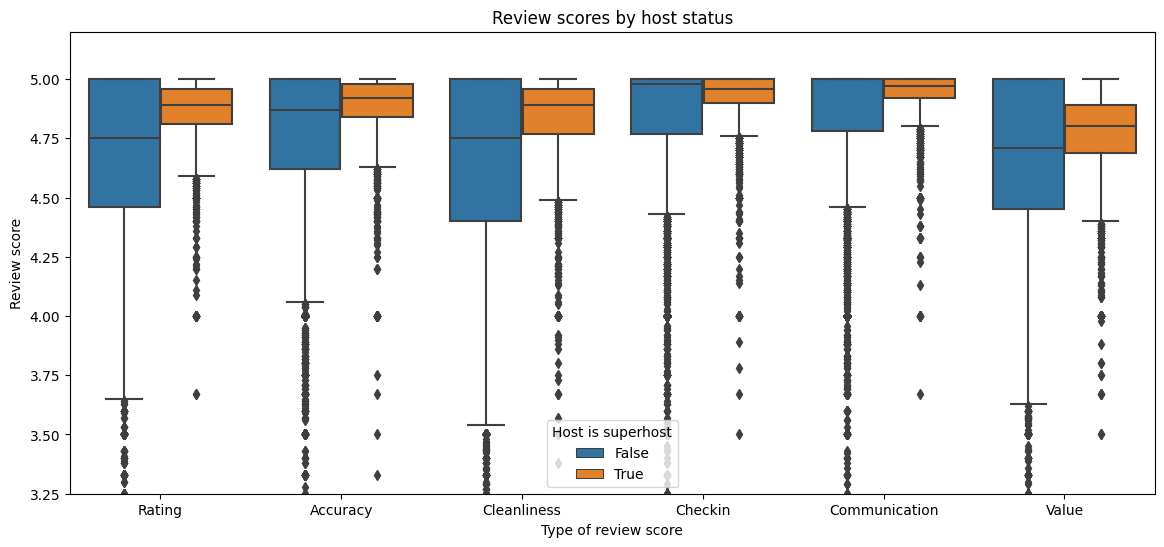

<Figure size 640x480 with 0 Axes>

In [735]:
# plot boxplots for each type of review scores for hosts and superhosts
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=data_superhosts_scores, x='review_score_type', y='review_score', hue='host_is_superhost', ax=ax)
ax.set_ylim((3.25, 5.2))
ax.set_xticks(range(len(review_scores_columns)), labels=['Rating', 'Accuracy', 'Cleanliness', 'Checkin', 'Communication', 'Value'])
ax.set(title='Review scores by host status', xlabel='Type of review score', ylabel='Review score')
plt.legend(title='Host is superhost', loc=8)
plt.show()
plt.clf()

### 3. Does price relates to review scores for location? <a id="eda_3"></a>

[(Back to Table of Contents)](#contents)

The goal is to establish if neighbourhoods with high review_scores_location tend to have higher price? In order to do that, listings are grouped by neighbourhoods and average review_scores_location and price calculated.

First plot shows histograms for average review_scores_location and price. The histogram for avg_review_scores_location is left-skewed with distinctive peak ~ 4.75. The histogram for average price is right-skewed with the majority of values concentrated below $400. There is one distinctive outlier for average price that will be removed.

Second graph shows scatterplots of the average review_scores_location and price. We can see a moderate positive correlation between the two variables. 

To measure the correlation strength, `scipy.stats` is used to calculate Pearson correlation coefficient and p-value. *Pearson coefficient* is equal to 0.328; as it is above 0.3 threshold we can say that there is **_moderate positive linear association between two variables_**. The *p-value* is a very small number ~ 3.565e-10; as it is below 0.05 threshold, we can say that **_the correlation is statistically significant_**.

In [749]:
# save id, neighbourhood, review_scores_location and price into a separate df
df = data[['id', 'neighbourhood', 'review_scores_location', 'price']].copy()
df['price'] = df['price'].astype('float64')
# group by neighbourhood and calculate average review_scores_location and price
df = df.groupby('neighbourhood').mean(numeric_only=True).round(2).reset_index()
df.columns = ['neighbourhood', 'avg_review_scores_location', 'avg_price']
df.head()

,neighbourhood,avg_review_scores_location,avg_price
0,Abbotsford,4.85,109.00
1,Alexandria,4.78,213.16
2,Allambie Heights,4.82,468.47
3,Allawah,4.71,124.20
4,Annandale,4.77,199.34


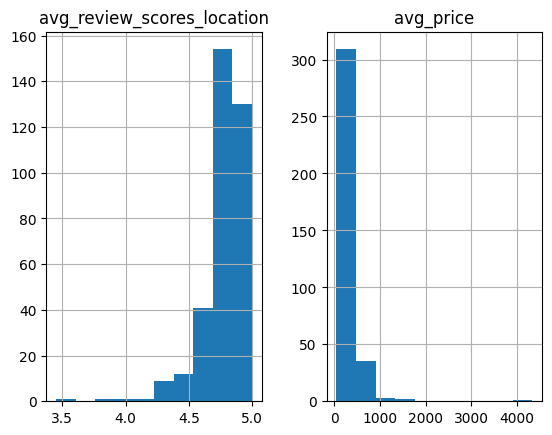

<Figure size 640x480 with 0 Axes>

In [762]:
# check if we have outliers for avg_review_scores_location and avg_price columns
df.hist()
plt.show()
plt.clf()
# distinctive one outlier for avg_price, to be removed for better visualizations
df = df[df['avg_price'] < 2000]

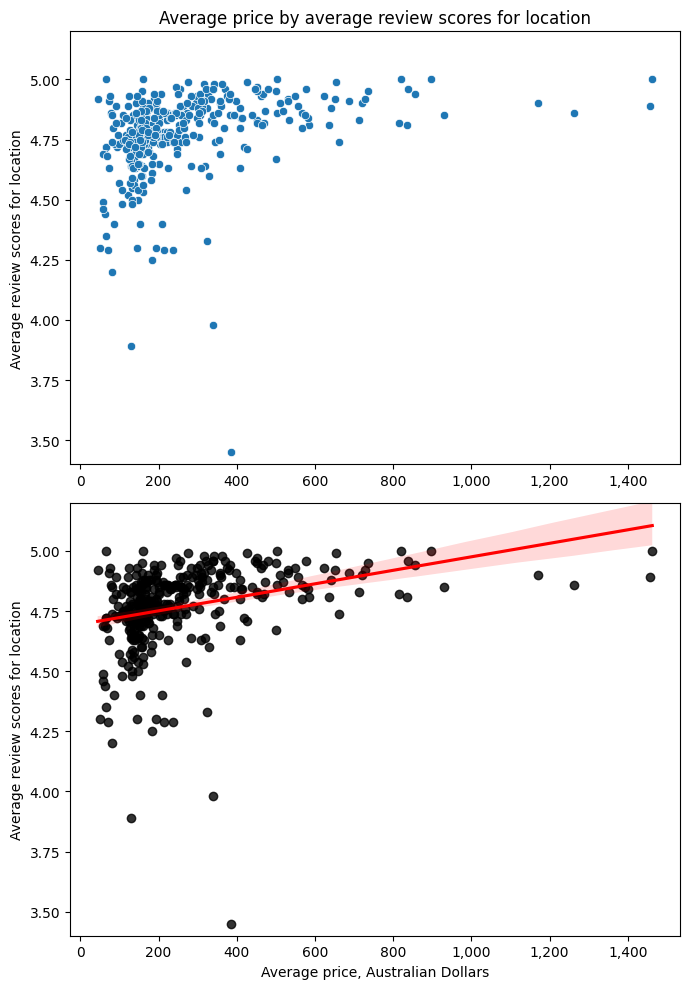

<Figure size 640x480 with 0 Axes>

In [764]:
# visualize relationship between avg_price and avg_review_scores_location
fig = plt.figure(figsize=(7, 10))
# plot regular scatterplot
ax = plt.subplot(2, 1, 1)
ax = sns.scatterplot(data=df, x='avg_price', y='avg_review_scores_location')
ax.xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylim(3.4, 5.2)
ax.set(title='Average price by average review scores for location',
        ylabel='Average review scores for location', xlabel=None)
# plot scatterplot with linear regression model
ax = plt.subplot(2, 1, 2)
ax = sns.regplot(data=df, x='avg_price', y='avg_review_scores_location', scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
ax.xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylim(3.4, 5.2)
ax.set(xlabel='Average price, Australian Dollars', ylabel='Average review scores for location')
plt.tight_layout()
plt.show()
plt.clf()

In [758]:
# import function to calculate Pearson correlation coefficient
from scipy.stats import pearsonr

# calculate Pearson correlation coefficient for avg_price and avg_review_scores_location
corr_price_score_loc, pval = pearsonr(df_lim['avg_price'], df_lim['avg_review_scores_location'])
print(f"Pearson coefficient: {round(corr_price_score_loc, 3)}")
print(f"p-value: {round(pval, 3)}")
# looks like pval is a very small number below threshold and cannot be distinguished from 0 by floating-point types.

Pearson coefficient: 0.328
p-value: 0.0


In [760]:
# to get exact value of pval, import pprint function 
from pprint import pprint

# print exact value of pval
pprint(pval)

3.56477501425419e-10


### 4. Does price relates to review scores for value? <a id="eda_4"></a>

[(Back to Table of Contents)](#contents)

The goal is to establish if listings with higher prices tend to have higher review scores for value?

First plot shows histograms for price and review_scores_value. The histogram for average price is right-skewed with the majority of values concentrated below $2,250. The histogram for review_scores_value is left-skewed with distinctive peak ~ 4.8-4.9. To improve visualizations, outliers for price are removed for the dataset (outliers - listings with price > $2,250).

After removal of outliers and missing values, we still have 16,506 listings in the dataset. To improve subsequent visualizations, a random sample of 25% is taken from the dataset. Because this subset is random, it should still be approximately generalizable to the full dataset. Second plot shows scatterplots of the review_scores_value and price. We can see a weak negative correlation between the two variables. 

To measure the correlation strength, `scipy.stats` is used to calculate Pearson correlation coefficient and p-value. *Pearson coefficient* is equal to -0.017; the linear association between two variables is weak negative. The *p-value* is 0.027; as it is below 0.05 threshold, we can say that the correlation is statistically significant.

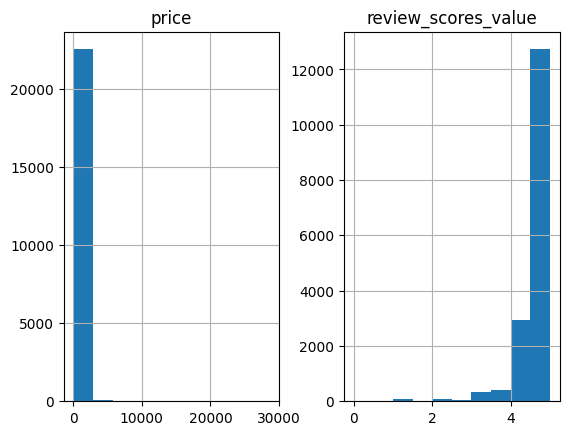

<Figure size 640x480 with 0 Axes>

In [766]:
# plot histograms for price and review_scores_value
data[['price', 'review_scores_value']].hist()
plt.show()
plt.clf()

In [819]:
# save listings with price up to 2250 into a separate df, rows with missing data removed
df = data[data['price'] <= 2250][['id', 'price', 'review_scores_value']].dropna(subset=['price', 'review_scores_value']).\
     reset_index(drop=True)
df.shape

(16506, 3)

In [820]:
# to improve visualization, take a random subset containing 25% of data
perc = 0.25
df_sub = df.sample(n=int(df.shape[0]*perc)) 

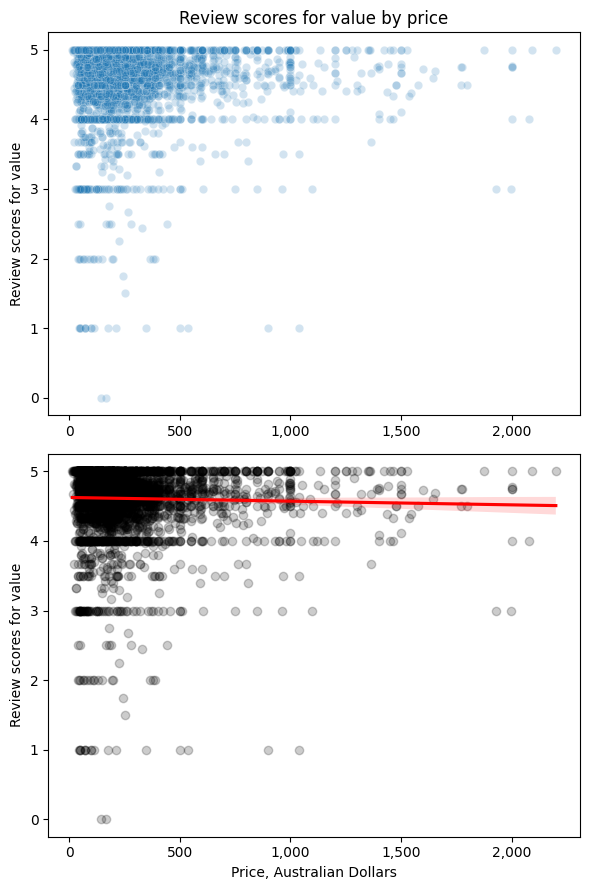

<Figure size 640x480 with 0 Axes>

In [817]:
# visualize relationship between price and review_scores_value
fig = plt.figure(figsize=(6, 9))
# plot regular scatterplot
ax = plt.subplot(2, 1, 1)
ax = sns.scatterplot(data=df_sub, x='price', y='review_scores_value', alpha=0.2)
ax.xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# ax.set_ylim(1.0, 5.2)
ax.set(title='Review scores for value by price',
        ylabel='Review scores for value', xlabel=None)
# plot scatterplot with linear regression model
ax = plt.subplot(2, 1, 2)
ax = sns.regplot(data=df_sub, x='price', y='review_scores_value',
                 scatter_kws={'color': 'black', 'alpha': 0.2}, line_kws={'color': 'red'})
ax.xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# ax.set_ylim(3.4, 5.2)
ax.set(xlabel='Price, Australian Dollars', ylabel='Review scores for value')
plt.tight_layout()
plt.show()
plt.clf()

In [818]:
# calculate Pearson correlation coefficient for price and review_scores_value
corr_price_score_val, pval = pearsonr(df['price'], df['review_scores_value'])
print(f"Pearson coefficient: {round(corr_price_score_val, 3)}")
print(f"p-value: {round(pval, 3)}")

Pearson coefficient: -0.017
p-value: 0.027


### 5. Does instant bookable status relates to availability? <a id="eda_5"></a>

[(Back to Table of Contents)](#contents)

Pie charts show that 27.9% of all listings have instant bookable status and 57.1% of listings have availability of at least one night in the upcoming 12 months.

To investigate if there is relationship between instant bookable status and availability, a contingency table of frequencies was created. This contingency table was used in the function `chi2_contingency` imported from `scipy.stats` library. *Chi-Square statistic* calculated is equal to 0.178. Our table has degrees of freedom equal to 1, for a significance of 0.05 a Chi-Square statistic should be above 3.841 for the association between two variables to be considered strong. As our Chi-Square statistic is significantly below the threshold, instant bookable and availability variables **are not associated**.

In [825]:
# save id, instant_bookable and has_availability into a new df
df = data[['id', 'instant_bookable', 'has_availability']]
# check if there is missing data
df.isnull().sum()

id                  0
instant_bookable    0
has_availability    0
dtype: int64

In [833]:
# calculate percentages of listings for each instant_bookable status
perc_inst_book_status = df.groupby('instant_bookable')['id'].count().reset_index()
perc_inst_book_status.columns = ['instant_bookable', 'percent']
total_ids = df.shape[0]
perc_inst_book_status['percent'] = round(perc_inst_book_status['percent'] / total_ids * 100, 1)
perc_inst_book_status

,instant_bookable,percent
0,False,72.1
1,True,27.9


In [834]:
# calculate percentages of listings for each has_availability status
perc_has_avail_status = df.groupby('has_availability')['id'].count().reset_index()
perc_has_avail_status.columns = ['has_availability', 'percent']
total_ids = df.shape[0]
perc_has_avail_status['percent'] = round(perc_has_avail_status['percent'] / total_ids * 100, 1)
perc_has_avail_status

,has_availability,percent
0,False,42.9
1,True,57.1


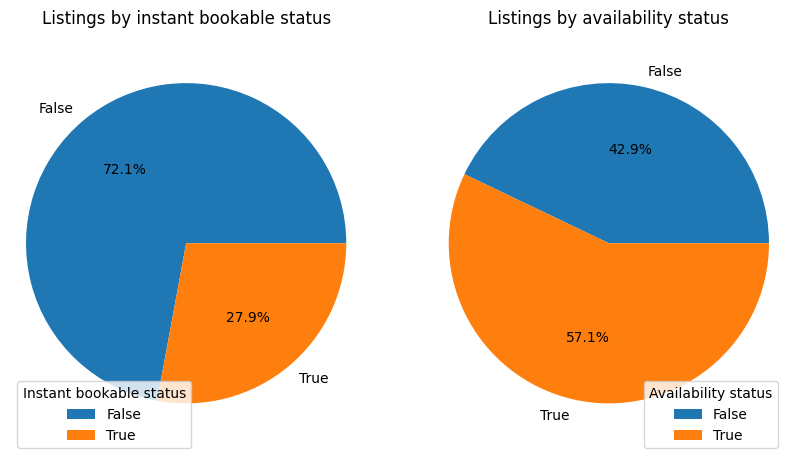

<Figure size 640x480 with 0 Axes>

In [842]:
# plot percentages of listings for each instant_bookable and has_availability statuses
fig = plt.figure(figsize=(10, 5.5))
# plot pie plot for instant_bookable status
ax = plt.subplot(1, 2, 1)
perc_inst_book_status.plot(kind='pie', x='instant_bookable', y='percent', title='Listings by instant bookable status',
                      labels=['False', 'True'], autopct='%.1f%%', ylabel='', ax=ax)
ax.axis('equal')
ax.legend(title='Instant bookable status', loc=3)
# plot pie plot for has_availability status
ax = plt.subplot(1, 2, 2)
perc_has_avail_status.plot(kind='pie', x='has_availability', y='percent', title='Listings by availability status',
                      labels=['False', 'True'], autopct='%.1f%%', ylabel='', ax=ax)
ax.axis('equal')
ax.legend(title='Availability status', loc=4)
plt.show()
plt.clf()

In [826]:
# create a contingency table with frequencies
inst_book_avail_freq = pd.crosstab(df['instant_bookable'], df['has_availability'])
inst_book_avail_freq


has_availability,False,True
instant_bookable,,
False,6989,9351
True,2723,3596


In [832]:
# load chi2_contingency function
from scipy.stats import chi2_contingency

# calculate Chi-Square statistic
chi2, pval, dof, expected = chi2_contingency(inst_book_avail_freq)
print(f'Chi-Square statistic: {round(chi2, 3)}')

Chi-Square statistic: 0.178


### 6. What facilities top-1% of most expensive listings offers when compared with middle-1% of listings price-wise? <a id="eda_6"></a>

[(Back to Table of Contents)](#contents)

To answer this questions, firstly a new column *subset* is created that contains labels for listings with prices that fall within top-1% or middle-1% ranges. Then mean price and facilities are calculated for each subset as well as median price.

As can be seen below, for the **middle-1% subset** average price is $178.3 and median price is $180. Such types of listings medianly can accommodate 3 people; have 1 bathroom, 1 bedroom and 2 beds. For the **top-1% subset** average price is $3,941.2 (~ 22 times more than for the middle-1% subset!) and median price is $2,825.5 (~ 16 times more than for the middle-1% subset!). Such types of listings medianly can accommodate 8 people; have 3.5 bathrooms, 4 bedrooms and 5 beds.

Next step was to analyze what exclusive amenities listings in the top-1% subset offer. A list of most-common exclusive amenities is presented on the second plot, among the most-common were: breakfast bar (with frequency ~ 4.2%), ironing board (3.7%), private outdoor pool - available all year, open 24 hours (2.6%), private gym in building (2.4%) and indoor fireplace: wood-burning (2.1%).

In [890]:
# set a list of conditions
conditions = [
    data['price'].ge(np.quantile(data['price'], q=0.495)) & data['price'].le(np.quantile(data['price'], q=0.505)),
    data['price'].ge(np.quantile(data['price'], q=0.99))
]
# set a list of subset names
choices = [
    'middle-1%',
    'top-1%'
]
# classify listings based on price
data['subset'] = np.select(conditions, choices, default=None)
# count number of listings in each subset
data.groupby('subset')['id'].count().sort_values(ascending=False).reset_index()

,subset,id
0,middle-1%,551
1,top-1%,228


In [892]:
# save required variables in a new df, drop NaN for subset column
col_list = ['id', 'price', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds','amenities', 'subset']
df = data.dropna(subset='subset')[col_list]
df.head()

,id,price,accommodates,bathrooms_text,bedrooms,beds,amenities,subset
15,75702,21580.0,2,1 bath,1.0,1.0,"[Conditioner, Long term stays allowed, Hot wat...",top-1%
105,767295,177.0,3,1 bath,1.0,2.0,"[Conditioner, Hot water, Cooking basics, Air c...",middle-1%
141,861107,180.0,2,2 baths,2.0,3.0,"[TV, Kitchen, Pets allowed, Wifi, Dryer, Washe...",middle-1%
163,1106059,177.0,1,1 shared bath,1.0,1.0,"[Conditioner, Hammock, Hot water, Outdoor show...",middle-1%
172,1122772,180.0,2,1 bath,1.0,1.0,"[TV, Hair dryer, Kitchen, Heating, Smoke alarm...",middle-1%


In [896]:
# leave only numbers in bathrooms_text column
df['bathrooms_text'] = df['bathrooms_text'].str.partition(' ')[0]
# change bathrooms_text column to numeric
df['bathrooms_text'] = pd.to_numeric(df['bathrooms_text'], downcast='float')
# rename bathrooms_text column
df.rename({'bathrooms_text': 'bathrooms'}, axis=1, inplace=True)
df['price'] = df['price'].astype('float64')

In [914]:
# calculate median variables for each subset
df_grouped = df.drop(['amenities', 'id'], axis=1).groupby('subset').median(numeric_only=True).round(1).reset_index()
df_grouped.rename({'price': 'median_price'}, axis=1, inplace=True)
# calculate average price for each subset
df_grouped['avg_price'] = df.groupby('subset').mean(numeric_only=True).round(1).reset_index()['price']
df_grouped

,subset,median_price,accommodates,bathrooms,bedrooms,beds,avg_price
0,middle-1%,180.0,3.0,1.0,1.0,2.0,178.3
1,top-1%,2825.5,8.0,3.5,4.0,5.0,3941.2


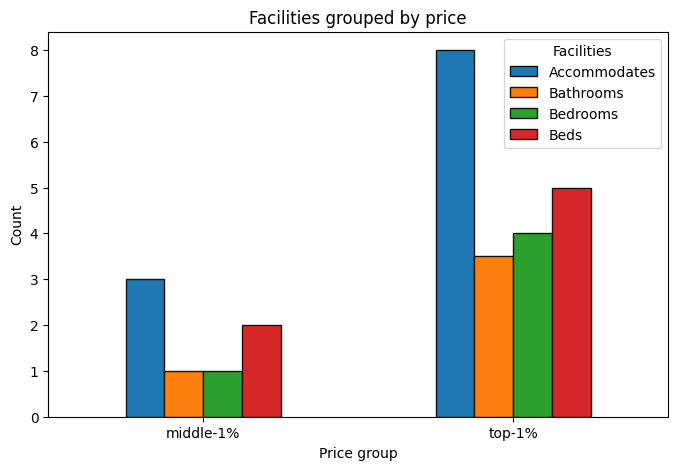

<Figure size 640x480 with 0 Axes>

In [915]:
# plot bar graph of facilities grouped by subset
facilities_col = ['accommodates', 'bathrooms', 'bedrooms', 'beds']
fig, ax = plt.subplots(figsize=(8, 5))
df_grouped.plot(x='subset', y=facilities_col, kind='bar', ax=ax, edgecolor='#131313')
ax.set(title='Facilities grouped by price', xlabel='Price group', ylabel='Count')
ax.legend(title='Facilities', labels=[x.title() for x in facilities_col])
plt.xticks(rotation=0)
plt.show()
plt.clf()

In [916]:
# count amenities for middle-1% subset
df_middle = df.loc[df['subset'] == 'middle-1%']['amenities'].explode().value_counts().reset_index()
df_middle.columns = ['amenities', 'count']
df_middle.head()

,amenities,count
0,Kitchen,527
1,Wifi,516
2,Smoke alarm,509
3,Essentials,498
4,Hangers,430


In [930]:
# count amenities for top-1% subset
df_top = df.loc[df['subset'] == 'top-1%']['amenities'].explode().value_counts().reset_index()
df_top.columns = ['amenities', 'count']
df_top.head()

,amenities,count
0,Wifi,210
1,Kitchen,206
2,Smoke alarm,181
3,Washer,167
4,Hair dryer,166


In [931]:
# add new column is_in_df_middle for df_top
df_top['is_in_df_middle'] = df_top['amenities'].isin(df_middle['amenities'])
# save into a new df amenities that are exclusive for top-1% subset and have count > 3
df_top_exclusive = df_top[(df_top['is_in_df_middle'] == False) & (df_top['count'] > 3)].reset_index(drop=True)

In [932]:
# calculate percentage for exclusive amenities
df_top_exclusive['perc'] = round(df_top_exclusive['count'] / df_top.shape[0] * 100, 2)
df_top_exclusive.head()

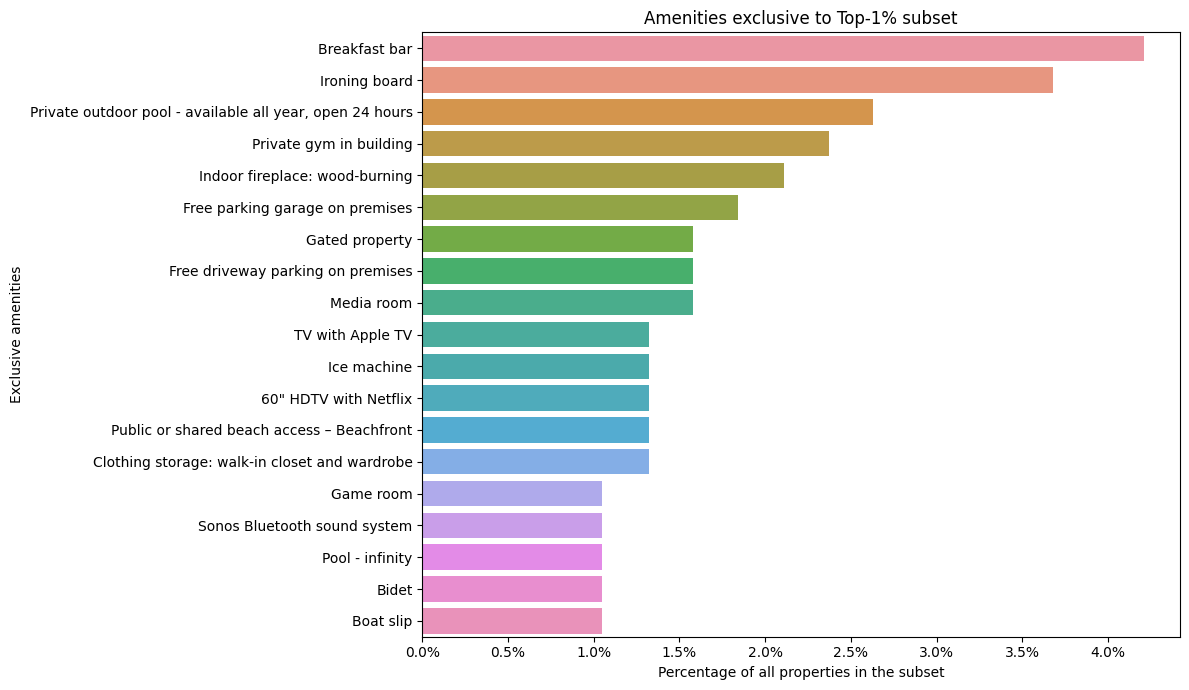

<Figure size 640x480 with 0 Axes>

In [938]:
# plot exclusive amenities
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data=df_top_exclusive, y='amenities', x='perc', ax=ax)
ax.set(title='Amenities exclusive to Top-1% subset', xlabel='Percentage of all properties in the subset',
       ylabel='Exclusive amenities')
ax.xaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(decimals=1))
plt.tight_layout()
plt.show()
plt.clf()

## Conclusion <a id="conclusion"></a>

[(Back to Table of Contents)](#contents)

The largest number of listings in the dataset have hosts with 6-8 years of experience. The analysis did not show any distinctive association between *hosts experience* and *review scores* received from customers, though there were some minor patterns e.g. hosts with experience 6-8 years and 9-11 years have smallest IQR ranges for check-in and communication indicating that such hosts tend to be consistently good with these types of activities.

Approximately 14% of listings in the dataset are managed by hosts with superhost status. *Superhost status* appears to have higher association with *review scores* than host experience: superhosts have smaller IQR ranges for all scores and higher median scores for rating, cleanliness, value and accuracy. Median scores for the remaining check-in and communication are very similar to both types of hosts.

The analysis also showed that there is moderate positive linear association between *price* and *review scores for location* (Pearson coefficient 0.328) and that this association is statistically significant. That indicates that listings in good locations tend to have a higher price.

The association between *price* and *review scores for value* is weak negative (Pearson coefficient -0.017) and statistically significant. This shows that higher price for a listing do not indicate higher score for value, which might have been expected before the analysis.

The analysis also showed that *instant bookable status* and *availability* are not associated.

Lastly, analysis explored *differences in facilities* for top-1% of most expensive listings and middle-1%. For the average price of $178.3 and median price of $180 a customer can get a middle-1% listing that can accommodate 3 people; have 1 bathroom, 1 bedroom and 2 beds. For the average price of $3,941.2 (~ 22 times more than for the middle-1%!) and median price of $2,825.5 (~ 16 times more than for the middle-1%!) top-1% listing medianly can accommodate 8 people; have 3.5 bathrooms, 4 bedrooms and 5 beds. Top-1% listing can also offer some exclusive amenities not available for middle-1% listing, such as: breakfast bar, ironing board, private outdoor pool - available all year, open 24 hours, private gym in building and indoor fireplace: wood-burning.